# Zomato Data Analysis

# Importing Libraries

In [2]:
import pandas as pd   # used for data manipulation and analysis
import numpy as np  # used for mathematical calculations
import matplotlib.pyplot  as plt  # used for visualisation
import seaborn as sns

 # Creating DataFrame

In [5]:
data = pd.read_csv("C:/Users/lenovo/Desktop/Data Science Projects/Zomato data .csv")
print(data)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

# Data cleaning

In [6]:
def handleValue(value):                        # Here we are removing /5 from the rate column by using user-defined function
    value = str(value).split('/')
    value =value[0]
    return float(value)
data['rate']= data['rate'].apply(handleValue)
print(data.head(5))

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [7]:
# checking if the data set is having any null value or not.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# QUestions for Analyzing the DATASET

# Question 1: What type of restaurant do the majority of customers order from?

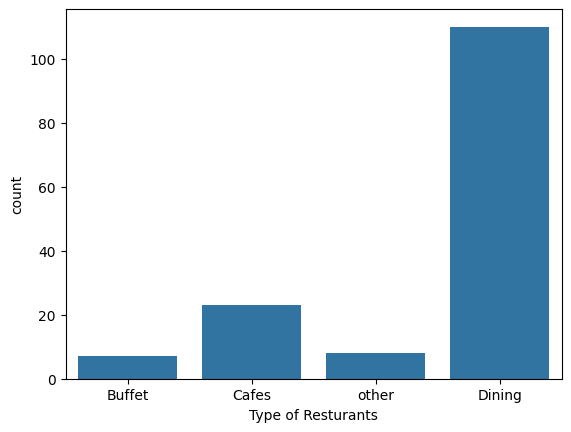

In [22]:

sns.countplot(x= data['listed_in(type)'])
plt.xlabel("Type of Resturants")
plt.show()

# How many votes has each type of restaurant received from customers?

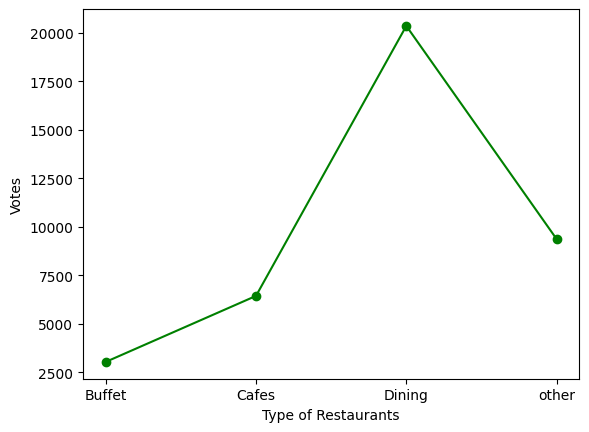

In [35]:
# plt.plot(data['listed_in(type)'],data['votes'])   # It is my thinking
# plt.xlabel("Type of Resstaurants")
# plt.ylabel("Votes for Reastaurants")
# plt.title("Votes Given To Restaurants")
# plt.show
# print("***********************************************************************************************************")
# what I have seen on Youtube.
grouped_data = data.groupby('listed_in(type)')['votes'].sum()
result= pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker='o')
plt.xlabel('Type of Restaurants')
plt.ylabel('Votes')
plt.show()


# What are the ratings that the majority of restaurants have received?

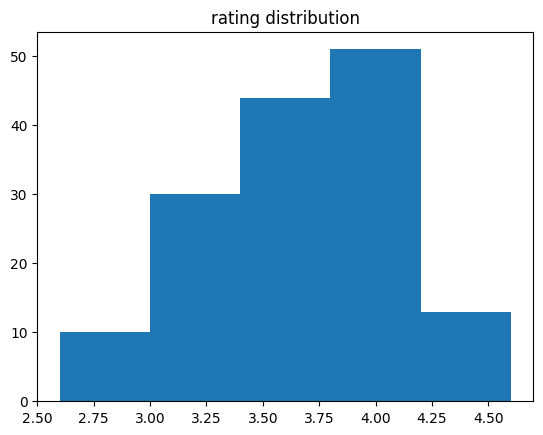

In [36]:
plt.hist(data['rate'], bins=5)
plt.title('rating distribution')
plt.show()

# )Zomato has observed that most couples order most of their food online. What is their average spending on each order?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

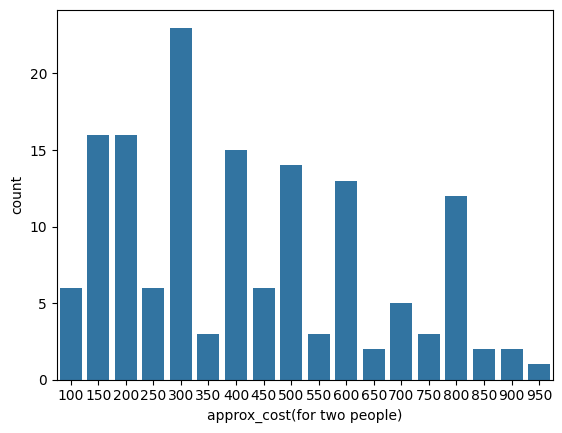

In [38]:
# Average spending by Couples
couple_data=data['approx_cost(for two people)']
sns.countplot(x= couple_data)

# Which mode (online or offline) has received the maximum rating?

<Axes: xlabel='online_order', ylabel='rate'>

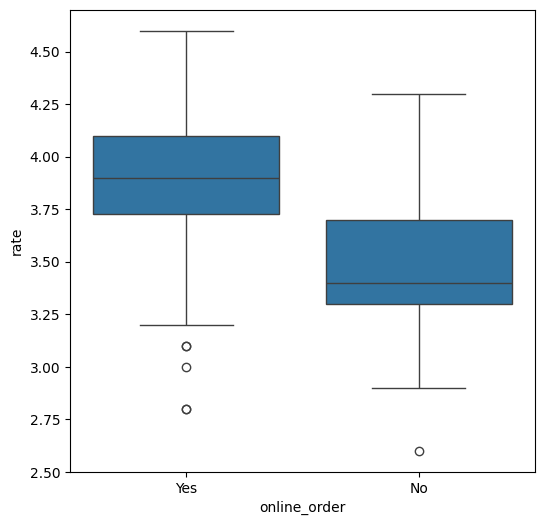

In [40]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate', data= data)

# Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

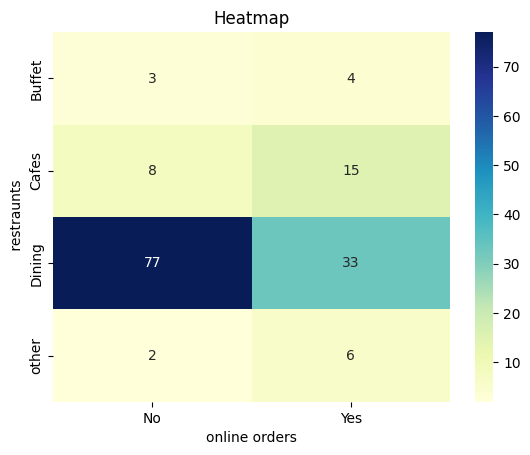

In [43]:
pivot_table = data.pivot_table(index="listed_in(type)",columns= "online_order", aggfunc="size", fill_value=0 )
sns.heatmap(pivot_table,annot= True, cmap= "YlGnBu", fmt ='d')
plt.title("Heatmap")
plt.xlabel("online orders")
plt.ylabel(" restraunts")
plt.show()